In [16]:
import numpy as np
from scipy import interp
import parseValidFiles
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from gensim import models
from sklearn import metrics
from scipy import spatial

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

j = 0
for i in range(3):
    LOAD_MODEL = 'master(validation{:d}).model'.format(i)
    HOUHAN_PATH = './train{:d}/'.format(i)
    
    exec(open('./parseValidFiles.py').read())

    model = models.Doc2Vec.load(LOAD_MODEL)

    labels = []
    values = []
    file_num = 0
    for root, dirs, files in os.walk(HOUHAN_PATH):    
        file_num += len(files)
    for root, dirs, files in os.walk(HOUHAN_PATH):    
        for i in range(len(vali_sentences)):
            print(vali_sentences[i].tags[0])
            sum_sim = 0
            vali_vector = model.infer_vector(vali_sentences[i].words)
            for file in files:
                docpath = os.path.join(root, file)   
                docu_vector = model.docvecs[docpath]
                doc_dis = 1 - spatial.distance.cosine(vali_vector, docu_vector) 
                sum_sim += doc_dis
            ave_sim = sum_sim / file_num
            if 'data' in vali_sentences[i].tags[0]:
                label = 1
                labels.append(label)
            else:
                label = 2
                labels.append(label)
            values.append(ave_sim)

    y = np.array(labels)
    scores = np.array(values)

    fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2, drop_intermediate=False)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    auc = metrics.auc(fpr, tpr)
    aucs.append(auc)

    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (j, auc))
    print(j)
    j += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

plt.savefig('roc.png')
print('finish')

/home/spsv06/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


./nucc/data064.txt
./nucc/data074.txt
./nucc/data050.txt
./nucc/data087.txt
./nucc/data034.txt
./nucc/data060.txt
./nucc/data033.txt
./nucc/data106.txt
./nucc/data079.txt
./nucc/data097.txt
./nucc/data072.txt
./nucc/data008.txt
./nucc/data051.txt
./nucc/data069.txt
./nucc/data109.txt
./nucc/data071.txt
./nucc/data015.txt
./nucc/data009.txt
./nucc/data066.txt
./nucc/data003.txt
./nucc/data113.txt
./nucc/data063.txt
./nucc/data058.txt
./nucc/data037.txt
./nucc/data114.txt
./nucc/data077.txt
./nucc/data091.txt
./nucc/data118.txt
./nucc/data002.txt
./nucc/data065.txt
./nucc/data111.txt
./nucc/data055.txt
./nucc/data021.txt
./nucc/data038.txt
./nucc/data007.txt
./nucc/data089.txt
./nucc/data056.txt
./nucc/data116.txt
./nucc/data005.txt
./nucc/data080.txt
./nucc/data081.txt
./nucc/data039.txt
./nucc/data047.txt
./nucc/data085.txt
./nucc/data049.txt
./nucc/data053.txt
./nucc/data127.txt
./nucc/data031.txt
./nucc/data104.txt
./nucc/data102.txt
./nucc/data036.txt
./nucc/data115.txt
./nucc/data0

./nucc/data018.txt
./nucc/data095.txt
./nucc/data092.txt
./nucc/data022.txt
./nucc/data027.txt
./nucc/data107.txt
./nucc/data046.txt
./test0/high_test0/high011.txt
./test0/high_test0/high001.txt
./test0/high_test0/high007.txt
./test0/high_test0/high010.txt
./test0/middle_test0/middle010.txt
./test0/middle_test0/middle023.txt
./test0/middle_test0/middle021.txt
./test0/middle_test0/middle020.txt
./test0/middle_test0/middle012.txt
./test0/middle_test0/middle016.txt
./test0/middle_test0/middle014.txt
./test0/middle_test0/middle009.txt
./test0/low_test0/low005.txt
./test0/low_test0/low001.txt
./test0/low_test0/low002.txt
./nucc/data064.txt
./nucc/data074.txt
./nucc/data050.txt
./nucc/data087.txt
./nucc/data034.txt
./nucc/data060.txt
./nucc/data033.txt
./nucc/data106.txt
./nucc/data079.txt
./nucc/data097.txt
./nucc/data072.txt
./nucc/data008.txt
./nucc/data051.txt
./nucc/data069.txt
./nucc/data109.txt
./nucc/data071.txt
./nucc/data015.txt
./nucc/data009.txt
./nucc/data066.txt
./nucc/data003.

./nucc/data086.txt
./nucc/data126.txt
./nucc/data029.txt
./nucc/data083.txt
./nucc/data030.txt
./nucc/data024.txt
./nucc/data093.txt
./nucc/data101.txt
./nucc/data117.txt
./nucc/data090.txt
./nucc/data023.txt
./nucc/data075.txt
./nucc/data057.txt
./nucc/data032.txt
./nucc/data042.txt
./nucc/data041.txt
./nucc/data073.txt
./nucc/data112.txt
./nucc/data124.txt
./nucc/data076.txt
./nucc/data123.txt
./nucc/data043.txt
./nucc/data006.txt
./nucc/data088.txt
./nucc/data082.txt
./nucc/data125.txt
./nucc/data108.txt
./nucc/data129.txt
./nucc/data016.txt
./nucc/data096.txt
./nucc/data122.txt
./nucc/data025.txt
./nucc/data018.txt
./nucc/data095.txt
./nucc/data092.txt
./nucc/data022.txt
./nucc/data027.txt
./nucc/data107.txt
./nucc/data046.txt
./test1/low_test1/low004.txt
./test1/low_test1/low006.txt
./test1/low_test1/low008.txt
./test1/high_test1/high005.txt
./test1/high_test1/high002.txt
./test1/high_test1/high006.txt
./test1/high_test1/high003.txt
./test1/middle_test1/middle018.txt
./test1/middl

./nucc/data040.txt
./nucc/data014.txt
./nucc/data052.txt
./nucc/data098.txt
./nucc/data061.txt
./nucc/data026.txt
./nucc/data048.txt
./nucc/data119.txt
./nucc/data067.txt
./nucc/data070.txt
./nucc/data078.txt
./nucc/data017.txt
./nucc/data011.txt
./nucc/data084.txt
./nucc/data099.txt
./nucc/data004.txt
./nucc/data062.txt
./nucc/data128.txt
./nucc/data010.txt
./nucc/data019.txt
./nucc/data044.txt
./nucc/data059.txt
./nucc/data103.txt
./nucc/data028.txt
./nucc/data121.txt
./nucc/data012.txt
./nucc/data035.txt
./nucc/data001.txt
./nucc/data105.txt
./nucc/data020.txt
./nucc/data054.txt
./nucc/data045.txt
./nucc/data100.txt
./nucc/data086.txt
./nucc/data126.txt
./nucc/data029.txt
./nucc/data083.txt
./nucc/data030.txt
./nucc/data024.txt
./nucc/data093.txt
./nucc/data101.txt
./nucc/data117.txt
./nucc/data090.txt
./nucc/data023.txt
./nucc/data075.txt
./nucc/data057.txt
./nucc/data032.txt
./nucc/data042.txt
./nucc/data041.txt
./nucc/data073.txt
./nucc/data112.txt
./nucc/data124.txt
./nucc/data0

./nucc/data114.txt
./nucc/data077.txt
./nucc/data091.txt
./nucc/data118.txt
./nucc/data002.txt
./nucc/data065.txt
./nucc/data111.txt
./nucc/data055.txt
./nucc/data021.txt
./nucc/data038.txt
./nucc/data007.txt
./nucc/data089.txt
./nucc/data056.txt
./nucc/data116.txt
./nucc/data005.txt
./nucc/data080.txt
./nucc/data081.txt
./nucc/data039.txt
./nucc/data047.txt
./nucc/data085.txt
./nucc/data049.txt
./nucc/data053.txt
./nucc/data127.txt
./nucc/data031.txt
./nucc/data104.txt
./nucc/data102.txt
./nucc/data036.txt
./nucc/data115.txt
./nucc/data068.txt
./nucc/data120.txt
./nucc/data013.txt
./nucc/data094.txt
./nucc/data110.txt
./nucc/data040.txt
./nucc/data014.txt
./nucc/data052.txt
./nucc/data098.txt
./nucc/data061.txt
./nucc/data026.txt
./nucc/data048.txt
./nucc/data119.txt
./nucc/data067.txt
./nucc/data070.txt
./nucc/data078.txt
./nucc/data017.txt
./nucc/data011.txt
./nucc/data084.txt
./nucc/data099.txt
./nucc/data004.txt
./nucc/data062.txt
./nucc/data128.txt
./nucc/data010.txt
./nucc/data0

Automatically created module for IPython interactive environment


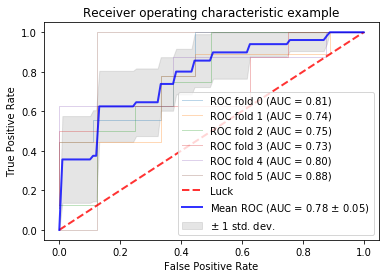

In [4]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [15]:
i = 0
for root, dirs, files in os.walk(HOUHAN_PATH):  
    for file in files:
        print(os.path.join(root, file))
        i += 1
        
print('\t' ,i)

./train0/low_train0/low007.txt
./train0/low_train0/low003.txt
./train0/low_train0/low004.txt
./train0/low_train0/low009.txt
./train0/low_train0/low006.txt
./train0/low_train0/low008.txt
./train0/high_train0/high005.txt
./train0/high_train0/high008.txt
./train0/high_train0/high009.txt
./train0/high_train0/high002.txt
./train0/high_train0/high013.txt
./train0/high_train0/high006.txt
./train0/high_train0/high003.txt
./train0/high_train0/high012.txt
./train0/middle_train0/middle018.txt
./train0/middle_train0/middle022.txt
./train0/middle_train0/middle019.txt
./train0/middle_train0/middle002.txt
./train0/middle_train0/middle015.txt
./train0/middle_train0/middle06.txt
./train0/middle_train0/middle004.txt
./train0/middle_train0/middle007.txt
./train0/middle_train0/middle005.txt
./train0/middle_train0/middle011.txt
./train0/middle_train0/middle013.txt
./train0/middle_train0/middle008.txt
./train0/middle_train0/middle003.txt
./train0/middle_train0/middle017.txt
./train0/middle_train0/middle001.